In [2]:
from model import Classifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
clf = Classifier(1, RandomForestClassifier())

In [4]:
params_trial_1 = {
                'vect__max_features': ([10000, 12000]),
                'vect__ngram_range': ([(1, 1)]),
                'tfidf__norm': (['l2']),
                'clf__n_estimators': (200, 500),
                'clf__criterion': (['gini']),
                'clf__max_depth': (1000, 5000)
}

clf.fit(params_trial_1,5)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  34 out of  40 | elapsed:  7.9min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  9.4min finished


done in 672.288s

scores!
mean: 0.639 std: (+/-0.021) for {'clf__criterion': 'gini', 'clf__max_depth': 1000, 'clf__n_estimators': 200, 'tfidf__norm': 'l2', 'vect__max_features': 10000, 'vect__ngram_range': (1, 1)}
mean: 0.640 std: (+/-0.013) for {'clf__criterion': 'gini', 'clf__max_depth': 1000, 'clf__n_estimators': 200, 'tfidf__norm': 'l2', 'vect__max_features': 12000, 'vect__ngram_range': (1, 1)}
mean: 0.645 std: (+/-0.017) for {'clf__criterion': 'gini', 'clf__max_depth': 1000, 'clf__n_estimators': 500, 'tfidf__norm': 'l2', 'vect__max_features': 10000, 'vect__ngram_range': (1, 1)}
mean: 0.647 std: (+/-0.013) for {'clf__criterion': 'gini', 'clf__max_depth': 1000, 'clf__n_estimators': 500, 'tfidf__norm': 'l2', 'vect__max_features': 12000, 'vect__ngram_range': (1, 1)}
mean: 0.636 std: (+/-0.016) for {'clf__criterion': 'gini', 'clf__max_depth': 5000, 'clf__n_estimators': 200, 'tfidf__norm': 'l2', 'vect__max_features': 10000, 'vect__ngram_range': (1, 1)}
mean: 0.639 std: (+/-0.014) for {'

In [10]:
clf.eval_best_n_params(0.8)

Finding most common params for the top 2 values
[{'gini': 2}, {1000: 1, 5000: 1}, {500: 2}, {'l2': 2}, {12000: 2}, {(1, 1): 2}]


In [11]:
params_trial_2 = {
                'vect__max_features': ([12000, 15000]),
                'vect__ngram_range': ([(1, 1)]),
                'tfidf__norm': (['l2']),
                'clf__n_estimators': (500, 750),
                'clf__criterion': (['gini']),
                'clf__max_depth': (1000, 5000)
}

clf.fit(params_trial_2,5)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  34 out of  40 | elapsed: 15.0min remaining:  2.6min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 16.5min finished


done in 1158.741s

scores!
mean: 0.649 std: (+/-0.012) for {'clf__criterion': 'gini', 'clf__max_depth': 1000, 'clf__n_estimators': 500, 'tfidf__norm': 'l2', 'vect__max_features': 12000, 'vect__ngram_range': (1, 1)}
mean: 0.650 std: (+/-0.016) for {'clf__criterion': 'gini', 'clf__max_depth': 1000, 'clf__n_estimators': 500, 'tfidf__norm': 'l2', 'vect__max_features': 15000, 'vect__ngram_range': (1, 1)}
mean: 0.649 std: (+/-0.010) for {'clf__criterion': 'gini', 'clf__max_depth': 1000, 'clf__n_estimators': 750, 'tfidf__norm': 'l2', 'vect__max_features': 12000, 'vect__ngram_range': (1, 1)}
mean: 0.652 std: (+/-0.015) for {'clf__criterion': 'gini', 'clf__max_depth': 1000, 'clf__n_estimators': 750, 'tfidf__norm': 'l2', 'vect__max_features': 15000, 'vect__ngram_range': (1, 1)}
mean: 0.643 std: (+/-0.014) for {'clf__criterion': 'gini', 'clf__max_depth': 5000, 'clf__n_estimators': 500, 'tfidf__norm': 'l2', 'vect__max_features': 12000, 'vect__ngram_range': (1, 1)}
mean: 0.649 std: (+/-0.011) for {

In [12]:
clf.eval_best_n_params(0.8)

Finding most common params for the top 2 values
[{'gini': 2}, {5000: 1, 1000: 1}, {750: 2}, {'l2': 2}, {15000: 2}, {(1, 1): 2}]


In [5]:
params_trial_3 = {
                'vect__max_features': ([15000]),
                'vect__ngram_range': ([(1, 1)]),
                'tfidf__norm': (['l2']),
                'clf__n_estimators': (750, 1000),
                'clf__criterion': (['gini']),
                'clf__max_depth': ([1000])
}

clf.fit(params_trial_3,5)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:  3.8min remaining:  5.7min
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  4.7min remaining:  2.0min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  6.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  6.8min finished


done in 632.930s

scores!
mean: 0.651 std: (+/-0.014) for {'clf__criterion': 'gini', 'clf__max_depth': 1000, 'clf__n_estimators': 750, 'tfidf__norm': 'l2', 'vect__max_features': 15000, 'vect__ngram_range': (1, 1)}
mean: 0.654 std: (+/-0.014) for {'clf__criterion': 'gini', 'clf__max_depth': 1000, 'clf__n_estimators': 1000, 'tfidf__norm': 'l2', 'vect__max_features': 15000, 'vect__ngram_range': (1, 1)}
Best score:
0.654 (+/-0.014)
with parameters set:
	clf__criterion: 'gini'
	clf__max_depth: 1000
	clf__n_estimators: 1000
	tfidf__norm: 'l2'
	vect__max_features: 15000
	vect__ngram_range: (1, 1)


In [6]:
clf.eval_best_n_params(0.8)

Finding most common params for the top 1 values
[{'gini': 1}, {1000: 1}, {1000: 1}, {'l2': 1}, {15000: 1}, {(1, 1): 1}]


In [5]:
params_trial_final = {
                'vect__max_features': ([12000]),
                'vect__ngram_range': ([(1, 1)]),
                'tfidf__norm': (['l2']),
                'clf__n_estimators': ([1000]),
                'clf__criterion': (['gini']),
                'clf__max_depth': ([1000])
}

clf.fit(params_trial_final,5)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.7min remaining:  5.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.7min finished


done in 448.684s

scores!
mean: 0.648 std: (+/-0.011) for {'clf__criterion': 'gini', 'clf__max_depth': 1000, 'clf__n_estimators': 1000, 'tfidf__norm': 'l2', 'vect__max_features': 12000, 'vect__ngram_range': (1, 1)}
Best score:
0.648 (+/-0.011)
with parameters set:
	clf__criterion: 'gini'
	clf__max_depth: 1000
	clf__n_estimators: 1000
	tfidf__norm: 'l2'
	vect__max_features: 12000
	vect__ngram_range: (1, 1)


Evaluation on test set:

Accuracy Score : 0.6046202867764207
Precision Score : 0.6046202867764207
Recall Score : 0.6046202867764207
F1 Score : 0.6046202867764207
Confusion Matrix
[[102   2   2   0   2   3   8  14  13  15   7   5   5   9  16  88   8   9
    8   3]
 [  4 230  34  10  10  28   7   8   8  10   2   3  17   2  11   1   2   0
    2   0]
 [  3  21 238  27  19  18   3  18   4  12   3   3   6   5   8   0   2   2
    2   0]
 [  2  18  44 220  26   9  12  11   2   2   0   3  35   0   6   0   1   1
    0   0]
 [  1   7   8  40 240   4  15  22   3   7   3   4  26   0   3   0   0   1
    0   1]
 [  2  33  41   8   4 254   3   8   5   6   2   8   7   1   8   3   0   0
    2   0]
 [  0   5   5  15  10   1 303  13  10   4   1   1   7   1   5   1   6   1
    1   0]
 [  4   7   5   5   8   4  12 262  26  12   2   1  24   5   6   1   7   1
    4   0]
 [  4   1   4   3   8   2  10  37 260  24   1   2  15   4   7   4   5   1
    5   1]
 [  3   3   3   1   1   2   2  22   3 300  43   1   5   

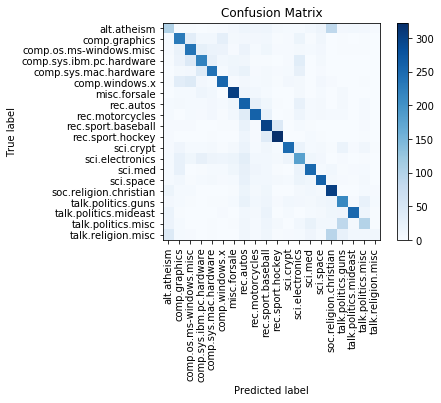

In [8]:
clf.eval_on_test([],False)